### Preprocessing: Train-test split and standardized scaler

In [1]:
import pandas as pd 
import numpy as np 
import plotly
import matplotlib.pyplot as plt 
import seaborn as sns 

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("water_portability_cleaned.csv")
df = pd.DataFrame(data)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3855,7.080795,158.207647,45243.028953,4.064878,247.180038,399.766965,16.086232,53.502086,4.108857,1
3856,7.961721,224.316760,11551.215680,9.492074,367.466010,451.808446,14.911191,79.687039,2.286943,1
3857,7.669013,205.595635,11579.441693,4.263279,356.136518,407.721613,10.829045,83.243808,4.589513,1
3858,7.371914,148.193698,42059.380417,7.966710,324.546262,544.848432,17.166504,62.677756,4.338957,1


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability',axis=1)
y = df['Potability']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [5]:
print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (3088, 9) 
y_train: (3088,)
X_test: (772, 9) 
y_test: (772,)


### Exploring dimensionalty reduction using PCA:

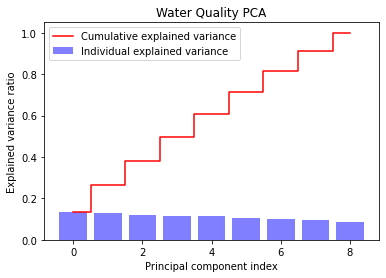

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

fig, ax = plt.subplots()
ax.bar(range(len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', color='blue', label='Individual explained variance')
ax.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', color='red', label='Cumulative explained variance')
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal component index')
ax.set_title("Water Quality PCA")
ax.legend(loc='best')
plt.show()


All of the features are independent, according to PCA, which supports our earlier findings from the correlation matrix and heatmap that the features do not have linear correlations with one another. According to this PCA analysis of the explained variance ratio, 8 additional components are still required to fully explain 80% of the variance. Dimensionality reduction will therefore not be helpful for this dataset.

### Model Training -- First Iteration

In [7]:
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### 1. Logistic Regression -- First Iteration

In [8]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_pred = LogReg.predict(X_test)
LogReg_acc = accuracy_score(y_test, LogReg_pred)
LogReg_mae = mean_absolute_error(y_test, LogReg_pred)
LogReg_mse = mean_squared_error(y_test, LogReg_pred)
LogReg_rmse = np.sqrt(mean_squared_error(y_test, LogReg_pred))
LogReg_precision = precision_score(y_test, LogReg_pred)
LogReg_recall = recall_score(y_test, LogReg_pred)
LogReg_f1 = f1_score(y_test, LogReg_pred)

In [9]:
print("The accuracy for Logistic Regression is", LogReg_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg_pred))

The accuracy for Logistic Regression is 0.48575129533678757
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       400
           1       0.47      0.55      0.51       372

    accuracy                           0.49       772
   macro avg       0.49      0.49      0.48       772
weighted avg       0.49      0.49      0.48       772



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

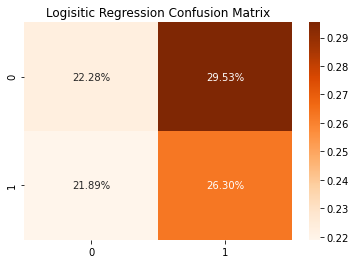

In [10]:
LogReg_cm = confusion_matrix(y_test, LogReg_pred)
sns.heatmap(LogReg_cm/np.sum(LogReg_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Logisitic Regression Confusion Matrix")

#### 2. K-Nearest Neighbour Regression -- First Iteration

In [11]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_mae = mean_absolute_error(y_test, KNN_pred)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_rmse = np.sqrt(mean_squared_error(y_test, KNN_pred))
KNN_precision = precision_score(y_test, KNN_pred) 
KNN_recall = recall_score(y_test, KNN_pred) 
KNN_f1 = f1_score(y_test, KNN_pred)

In [12]:
print("The accuracy for KNeighbors is", KNN_acc)
print("The classification report using KNeighbors is:", KNN_acc)
print(classification_report(y_test, KNN_pred))

The accuracy for KNeighbors is 0.6489637305699482
The classification report using KNeighbors is: 0.6489637305699482
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       400
           1       0.62      0.69      0.65       372

    accuracy                           0.65       772
   macro avg       0.65      0.65      0.65       772
weighted avg       0.65      0.65      0.65       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

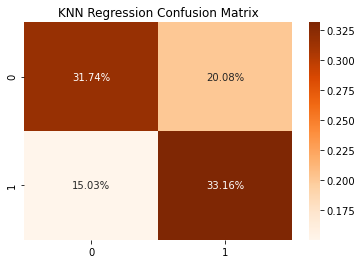

In [13]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("KNN Regression Confusion Matrix")

#### 3. Decision Tree Classifier -- First Iteration

In [14]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
DecTree_pred = DecTree.predict(X_test)
DecTree_acc = accuracy_score(y_test, DecTree_pred)
DecTree_precision = precision_score(y_test, DecTree_pred) 
DecTree_recall = recall_score(y_test, DecTree_pred) 
DecTree_f1 = f1_score(y_test, DecTree_pred)

In [15]:
print("The accuracy for Decision Tree is", DecTree_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree_pred))

The accuracy for Decision Tree is 0.7940414507772021
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       400
           1       0.74      0.89      0.81       372

    accuracy                           0.79       772
   macro avg       0.80      0.80      0.79       772
weighted avg       0.81      0.79      0.79       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

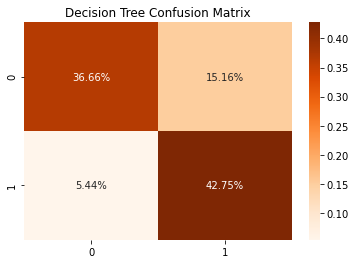

In [16]:
DecTree_cm = confusion_matrix(y_test, DecTree_pred)
sns.heatmap(DecTree_cm/np.sum(DecTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Decision Tree Confusion Matrix")

#### 4. Random Forest Classifier -- First Iteration

In [17]:
RFTree = RandomForestClassifier()
RFTree.fit(X_train, y_train)
RFTree_pred = RFTree.predict(X_test)
RFTree_acc = accuracy_score(y_test, RFTree_pred)
RFTree_precision = precision_score(y_test, RFTree_pred) 
RFTree_recall = recall_score(y_test, RFTree_pred) 
RFTree_f1 = f1_score(y_test, RFTree_pred)

In [18]:
print("The accuracy for Random Forest is", RFTree_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree_pred))

The accuracy for Random Forest is 0.8432642487046632
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       400
           1       0.84      0.84      0.84       372

    accuracy                           0.84       772
   macro avg       0.84      0.84      0.84       772
weighted avg       0.84      0.84      0.84       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

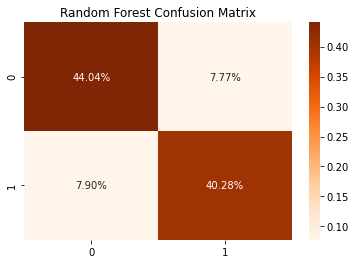

In [19]:
RFTree_cm = confusion_matrix(y_test, RFTree_pred)
sns.heatmap(RFTree_cm/np.sum(RFTree_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("Random Forest Confusion Matrix")

#### 5. Support Vector Machine Classifier -- First Iteration

In [20]:
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
SVM_precision = precision_score(y_test, SVM_pred) 
SVM_recall = recall_score(y_test, SVM_pred) 
SVM_f1 = f1_score(y_test, SVM_pred)

In [21]:
print("The accuracy for SVM is", SVM_acc)
print("The classification report using SVM is:", SVM_acc)
print(classification_report(y_test, SVM_pred))

The accuracy for SVM is 0.6593264248704663
The classification report using SVM is: 0.6593264248704663
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       400
           1       0.64      0.67      0.65       372

    accuracy                           0.66       772
   macro avg       0.66      0.66      0.66       772
weighted avg       0.66      0.66      0.66       772



Text(0.5, 1.0, 'SVM Confusion Matrix')

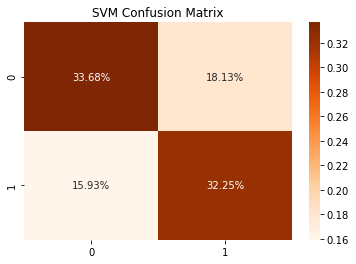

In [22]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("SVM Confusion Matrix")

#### 6. XGBoost Classifier -- First Interation

In [23]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)
XGB_acc = accuracy_score(y_test, XGB_pred)
XGB_precision = precision_score(y_test, XGB_pred)
XGB_recall = recall_score(y_test, XGB_pred)
XGB_f1 = f1_score(y_test, XGB_pred)

In [24]:
print("The accuracy for XGBoost is", XGB_acc)
print("The classification report using XGBoost is:", XGB_acc)
print(classification_report(y_test, XGB_pred))

The accuracy for XGBoost is 0.7927461139896373
The classification report using XGBoost is: 0.7927461139896373
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       400
           1       0.75      0.84      0.80       372

    accuracy                           0.79       772
   macro avg       0.80      0.79      0.79       772
weighted avg       0.80      0.79      0.79       772



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

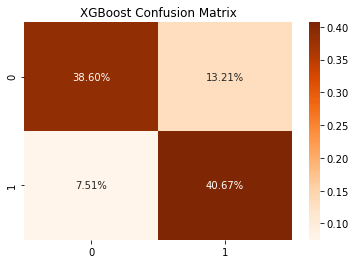

In [25]:
XGB_cm = confusion_matrix(y_test, XGB_pred)
sns.heatmap(XGB_cm/np.sum(XGB_cm), annot = True, fmt = '0.2%', cmap = 'Oranges')
plt.title("XGBoost Confusion Matrix")

#### Algorithm Comparison -- First Iteration

In [26]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
    'Precision' :[LogReg_precision, KNN_precision, DecTree_precision, RFTree_precision, SVM_precision, XGB_precision],
    'Recall' :[LogReg_recall, KNN_recall, DecTree_recall, RFTree_recall, SVM_recall, XGB_recall],
    'F1 Score' :[LogReg_f1, KNN_f1, DecTree_f1, RFTree_f1, SVM_f1, XGB_f1]
})
models = models.sort_values(by='Accuracy', ascending=False)

In [27]:
models

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.843264,0.838275,0.836022,0.837147
2,Decision Tree,0.794041,0.738255,0.887097,0.805861
5,XGBoost,0.792746,0.754808,0.844086,0.796954
4,Support Vector,0.659326,0.640103,0.669355,0.654402
1,KNN Regression,0.648964,0.622871,0.688172,0.653895
0,Logistic Regression,0.485751,0.470998,0.545699,0.505604


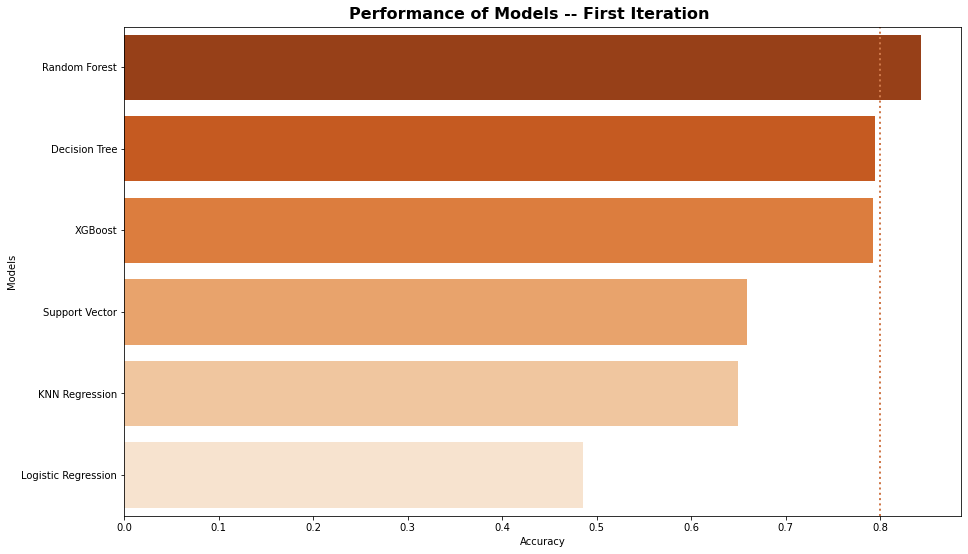

In [28]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Oranges_r')

ax.figure.suptitle('Performance of Models -- First Iteration',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');

After the first iteration of model training we can see that Logistic Regression performed the lowest while KNN, SVM  had close accuracy values around 70% and Descision Tree has around 78%. XGBoost  had a 82% accuracy while Random Forest was able to be accurate to 84% 

### Hyper-tunning parameters

In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lgr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

In [30]:
para_lgr = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
grid_lgr = GridSearchCV(lgr, param_grid=para_lgr, cv=5)
grid_lgr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lgr.best_params_)

Best parameters for Logistic Regression: {'penalty': 'l1', 'solver': 'liblinear'}


In [31]:
para_knn = {'n_neighbors':np.arange(1, 50), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 48, 'weights': 'distance'}


In [32]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) 
grid_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 45, 'min_samples_leaf': 1}


In [33]:
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}


In [34]:
para_svc = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(svc, param_grid=para_svc, cv=5)
grid_svc.fit(X_train, y_train)
print("Best parameters for SVM:", grid_svc.best_params_)

Best parameters for SVM: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [35]:
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for XGBoost: {'n_estimators': 1000, 'learning_rate': 0.8}


#Predictive Modeling/Classication -- Second Iteration:
After hypertuning

#1. Logistic Regression -- Second Iteration

In [36]:
LogReg2 = LogisticRegression(penalty = 'l1', solver= 'liblinear')
LogReg2.fit(X_train, y_train)
LogReg2_pred = LogReg2.predict(X_test)
LogReg2_acc = accuracy_score(y_test, LogReg2_pred)
LogReg2_mae = mean_absolute_error(y_test, LogReg2_pred)
LogReg2_mse = mean_squared_error(y_test, LogReg2_pred)
LogReg2_rmse = np.sqrt(mean_squared_error(y_test, LogReg2_pred))
LogReg2_precision = precision_score(y_test, LogReg2_pred)
LogReg2_recall = recall_score(y_test, LogReg2_pred)
LogReg2_f1 = f1_score(y_test, LogReg2_pred)

In [37]:
print("The accuracy for Logistic Regression is", LogReg2_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, LogReg2_pred))

The accuracy for Logistic Regression is 0.48575129533678757
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       400
           1       0.47      0.55      0.51       372

    accuracy                           0.49       772
   macro avg       0.49      0.49      0.48       772
weighted avg       0.49      0.49      0.48       772



Text(0.5, 1.0, 'Logisitic Regression Confusion Matrix')

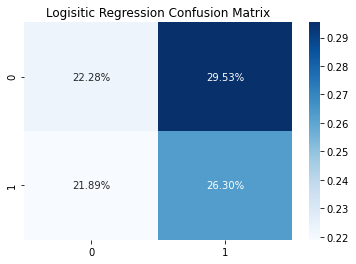

In [38]:
LogReg2_cm = confusion_matrix(y_test, LogReg2_pred)
sns.heatmap(LogReg2_cm/np.sum(LogReg2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Logisitic Regression Confusion Matrix")

#2. K-Nearest Neighbour Regression -- Second Iteration

In [39]:
KNN2 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 1, weights ='uniform')
KNN2.fit(X_train, y_train)
KNN2_pred = KNN2.predict(X_test)
KNN2_acc = accuracy_score(y_test, KNN2_pred)
KNN2_mae = mean_absolute_error(y_test, KNN2_pred)
KNN2_mse = mean_squared_error(y_test, KNN2_pred)
KNN2_rmse = np.sqrt(mean_squared_error(y_test, KNN2_pred))
KNN2_precision = precision_score(y_test, KNN2_pred) 
KNN2_recall = recall_score(y_test, KNN2_pred) 
KNN2_f1 = f1_score(y_test, KNN2_pred)

In [40]:
print("The accuracy for KNeighbors is", KNN2_acc)
print("The classification report using KNeighbors is:", KNN2_acc)
print(classification_report(y_test, KNN2_pred))

The accuracy for KNeighbors is 0.7746113989637305
The classification report using KNeighbors is: 0.7746113989637305
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       400
           1       0.72      0.86      0.79       372

    accuracy                           0.77       772
   macro avg       0.78      0.78      0.77       772
weighted avg       0.79      0.77      0.77       772



Text(0.5, 1.0, 'KNN Regression Confusion Matrix')

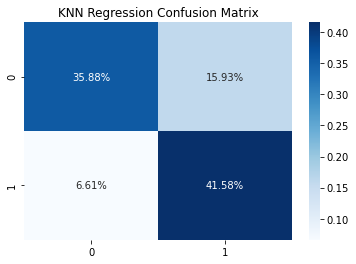

In [41]:
KNN2_cm = confusion_matrix(y_test, KNN2_pred)
sns.heatmap(KNN2_cm/np.sum(KNN2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("KNN Regression Confusion Matrix")

#3. Decision Tree Classifier -- Second Iteration

In [42]:
DecTree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 44, min_samples_leaf = 1)
DecTree2.fit(X_train, y_train)
DecTree2_pred = DecTree2.predict(X_test)
DecTree2_acc = accuracy_score(y_test, DecTree2_pred)
DecTree2_precision = precision_score(y_test, DecTree2_pred) 
DecTree2_recall = recall_score(y_test, DecTree2_pred) 
DecTree2_f1 = f1_score(y_test, DecTree2_pred)

In [43]:
print("The accuracy for Decision Tree is", DecTree2_acc)
print("The classification report using Decision Tree is:")
print(classification_report(y_test, DecTree2_pred))

The accuracy for Decision Tree is 0.7875647668393783
The classification report using Decision Tree is:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       400
           1       0.73      0.88      0.80       372

    accuracy                           0.79       772
   macro avg       0.80      0.79      0.79       772
weighted avg       0.80      0.79      0.79       772



Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

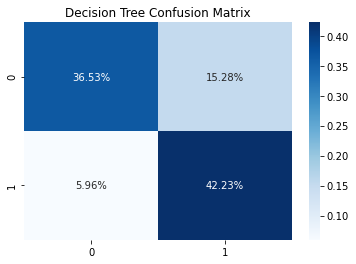

In [44]:
DecTree2_cm = confusion_matrix(y_test, DecTree2_pred)
sns.heatmap(DecTree2_cm/np.sum(DecTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Decision Tree Confusion Matrix")

#4. Random Forest Classifier --  Second Iteration

In [45]:
RFTree2 = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 200)
RFTree2.fit(X_train, y_train)
RFTree2_pred = RFTree2.predict(X_test)
RFTree2_acc = accuracy_score(y_test, RFTree2_pred)
RFTree2_precision = precision_score(y_test, RFTree2_pred) 
RFTree2_recall = recall_score(y_test, RFTree2_pred) 
RFTree2_f1 = f1_score(y_test, RFTree2_pred)

In [46]:
print("The accuracy for Random Forest is", RFTree2_acc)
print("The classification report using Random Forest is:")
print(classification_report(y_test, RFTree2_pred))

The accuracy for Random Forest is 0.8484455958549223
The classification report using Random Forest is:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       400
           1       0.84      0.85      0.84       372

    accuracy                           0.85       772
   macro avg       0.85      0.85      0.85       772
weighted avg       0.85      0.85      0.85       772



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

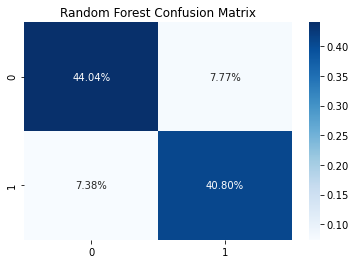

In [47]:
RFTree2_cm = confusion_matrix(y_test, RFTree2_pred)
sns.heatmap(RFTree2_cm/np.sum(RFTree2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("Random Forest Confusion Matrix")

#5. Support Vector Machine Classifier -- Second Iteration

In [48]:
SVM2 = SVC(C = 10, gamma = 1, kernel = 'rbf')
SVM2.fit(X_train, y_train)
SVM2_pred = SVM2.predict(X_test)
SVM2_acc = accuracy_score(y_test, SVM2_pred)
SVM2_precision = precision_score(y_test, SVM2_pred) 
SVM2_recall = recall_score(y_test, SVM2_pred) 
SVM2_f1 = f1_score(y_test, SVM2_pred)

In [49]:
print("The accuracy for SVM is", SVM2_acc)
print("The classification report using SVM is:", SVM2_acc)
print(classification_report(y_test, SVM2_pred))

The accuracy for SVM is 0.822538860103627
The classification report using SVM is: 0.822538860103627
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       400
           1       0.84      0.77      0.81       372

    accuracy                           0.82       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.82      0.82      0.82       772



Text(0.5, 1.0, 'SVM Confusion Matrix')

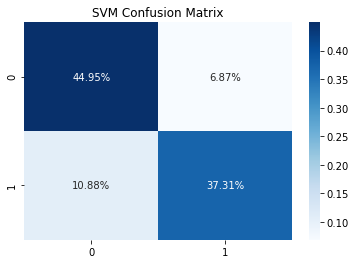

In [50]:
SVM2_cm = confusion_matrix(y_test, SVM2_pred)
sns.heatmap(SVM2_cm/np.sum(SVM2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("SVM Confusion Matrix")

#6. XGBoost Classifier -- Second Iteration

In [51]:
XGB2 = XGBClassifier(n_estimators = 600, learning_rate = 0.8)
XGB2.fit(X_train, y_train)
XGB2_pred = XGB2.predict(X_test)
XGB2_acc = accuracy_score(y_test, XGB2_pred)
XGB2_precision = precision_score(y_test, XGB2_pred)
XGB2_recall = recall_score(y_test, XGB2_pred)
XGB2_f1 = f1_score(y_test, XGB2_pred)

In [52]:
print("The accuracy for XGBoost is", XGB2_acc)
print("The classification report using XGBoost is:", XGB2_acc)
print(classification_report(y_test, XGB2_pred))

The accuracy for XGBoost is 0.8160621761658031
The classification report using XGBoost is: 0.8160621761658031
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       400
           1       0.78      0.86      0.82       372

    accuracy                           0.82       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.82      0.82      0.82       772



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

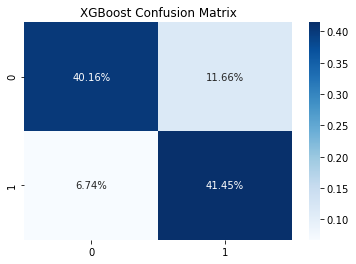

In [53]:
XGB2_cm = confusion_matrix(y_test, XGB2_pred)
sns.heatmap(XGB2_cm/np.sum(XGB2_cm), annot = True, fmt = '0.2%', cmap = 'Blues')
plt.title("XGBoost Confusion Matrix")

#Comparing Models -- Second Iteration:

In [54]:
models2 = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    'Accuracy' :[LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc],
    'Precision' :[LogReg2_precision, KNN2_precision, DecTree2_precision, RFTree2_precision, SVM2_precision, XGB2_precision],
    'Recall' :[LogReg2_recall, KNN2_recall, DecTree2_recall, RFTree2_recall, SVM2_recall, XGB2_recall],
    'F1 Score' :[LogReg2_f1, KNN2_f1, DecTree2_f1, RFTree2_f1, SVM2_f1, XGB2_f1]
})
models2 = models2.sort_values(by='Accuracy', ascending=False)

In [55]:
models2

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.848446,0.840000,0.846774,0.843373
4,Support Vector,0.822539,0.844575,0.774194,0.807854
5,XGBoost,0.816062,0.780488,0.860215,0.818414
2,Decision Tree,0.787565,0.734234,0.876344,0.799020
1,KNN Regression,0.774611,0.722973,0.862903,0.786765
0,Logistic Regression,0.485751,0.470998,0.545699,0.505604


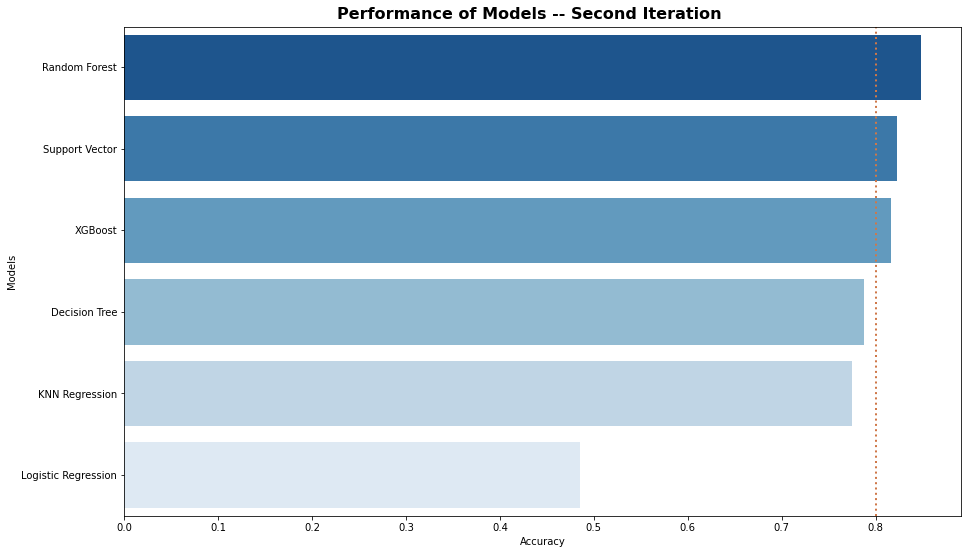

In [56]:
fig = plt.figure(figsize=(15,9))

ax = sns.barplot(data=models2, 
                 y='Model', 
                 x='Accuracy',
                 palette = 'Blues_r')

ax.figure.suptitle('Performance of Models -- Second Iteration',y=0.91, size = 16, color = 'black', weight='bold');

plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.axvline(x = 0.8, ymin = 0, ymax = 1,
            linewidth = 2, linestyle =":",
            color ='#cf7849');

#Comparing First and Second Iterations:

In [57]:
comp_iterations = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'],
    '2nd Iteration' :[LogReg2_acc, KNN2_acc, DecTree2_acc, RFTree2_acc, SVM2_acc, XGB2_acc],
    '1st Iteration' :[LogReg_acc, KNN_acc, DecTree_acc, RFTree_acc, SVM_acc, XGB_acc],
})
comp_iterations

,Model,2nd Iteration,1st Iteration
0,Logistic Regression,0.485751,0.485751
1,KNN Regression,0.774611,0.648964
2,Decision Tree,0.787565,0.794041
3,Random Forest,0.848446,0.843264
4,Support Vector,0.822539,0.659326
5,XGBoost,0.816062,0.792746


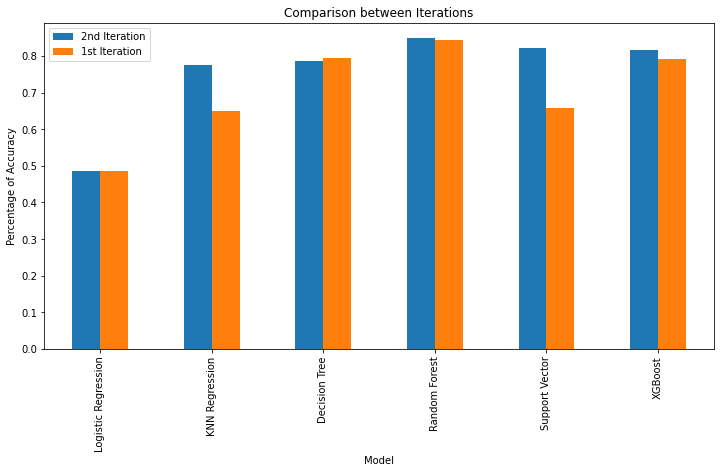

In [58]:
comp_iterations.plot.bar(figsize=(12,6))
plt.xticks([0,1,2,3,4,5],['Logistic Regression', 'KNN Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost'])
plt.ylabel('Percentage of Accuracy') 
plt.xlabel('Model') 
plt.title('Comparison between Iterations');

After our second iteration of model (with hypertuning) we can see that Random Forest Classifier algortihm performed the best with the highest accuracy. We will use Random Forest and SVM to continue our model evaluation with cross validation

#Cross Validation

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

cv = KFold(n_splits=10, random_state=1, shuffle=True)

RFTree2_scores = cross_val_score(RFTree2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
SVM2_scores = cross_val_score(SVM2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
XGB2_scores = cross_val_score(XGB2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy of CV - Random Forest: %.4f (%.4f)' % (mean(RFTree2_scores), stdev(RFTree2_scores)))
print('Accuracy of CV - SVM: %.4f (%.4f)' % (mean(SVM2_scores), stdev(SVM2_scores)))
print('Accuracy of CV - XGBoost: %.4f (%.4f)' % (mean(XGB2_scores), stdev(XGB2_scores)))

Accuracy of CV - Random Forest: 0.8565 (0.0194)
Accuracy of CV - SVM: 0.8832 (0.0222)
Accuracy of CV - XGBoost: 0.8117 (0.0277)


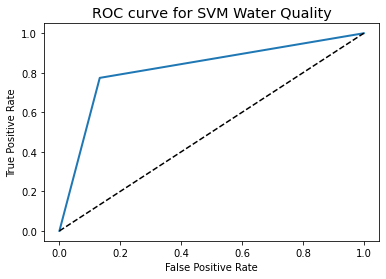

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, SVM2_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Water Quality')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, SVM2_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8208


In [62]:
Cross_validated_ROC_AUC = cross_val_score(SVM2, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8727
